Em um jupyter notebook:

* Carregue uma base de dados de classificação (binária ou multiclasse, mas não multirrótulo) que NÃO esteja nos toy datasets do scikit-learn;

* Treine um modelo da classe LogisticRegression do scikit-learn com toda a base;

* Calcule o MSE (erro quadrático médio) para todos os exemplos da usada como treino no modelo treinado;

* Plote 3 gráficos (2D) o MSE em função do atributo intercept_ da classe LogisticRegression. Mantenha os valores do atributo coef_ fixos e varie o valor de intercept_ entre intercept_ - delta e intercept_ + delta.

* Diferentemente da tarefa de regressão, o gráfico do erro da classificação, muito provavelmente, não terá a aparência "bem comportada" que o gráfico do erro da regressão teve. Por isso, você precisará encontrar 3 deltas (um para cada gráfico). Cada delta provavelmente apresentará uma impressão diferente do comportamento da função de erro.

* O atributo intercept_ da classe LogisticRegression é um array que guarda o valor de interceptação de cada classe do problema da base de dados. Portanto, será necessário fazer 3 gráficos para cada valor do intercept_. Exemplo: problema com 3 classes, 9 gráficos.


* **Dataset:** https://archive.ics.uci.edu/ml/datasets/Car+Evaluation
* **Objetivo:** regressão logística para identificar o conceito do veículo: unacc, acc, good, vgood

##Import dataset e tratamento básico

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pylab as plt

In [2]:
#IMPORT DATASET
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data

--2020-11-18 11:59:03--  https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51867 (51K) [application/x-httpd-php]
Saving to: ‘car.data’

car.data            100%[===================>]  50.65K  --.-KB/s    in 0.1s    

2020-11-18 11:59:04 (493 KB/s) - ‘car.data’ saved [51867/51867]



In [4]:
df = pd.read_csv("car.data",header=None)
df.columns = ["buying","maint","doors","persons","lug_boot","safety","concept"]

In [5]:
df

,buying,maint,doors,persons,lug_boot,safety,concept
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [6]:
#Feito por conta do erro "could not convert string to float" no LogisticRegression
le = LabelEncoder()
df = df.apply(le.fit_transform)

In [7]:
df

,buying,maint,doors,persons,lug_boot,safety,concept
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [8]:
X = df[["buying","maint","doors","persons","lug_boot","safety"]]
y = df[["concept"]]

X.shape, y.shape

((1728, 6), (1728, 1))

##Treino do modelo da classe LogisticRegression do scikit-learn com toda a base

In [9]:
modelo = LogisticRegression()

def fit_predict(X, y):
  modelo.fit(X, y)
  ypred = modelo.predict(X)

  return ypred

ypred = fit_predict(X, y) 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##Calculo do MSE (erro quadrático médio) para todos os exemplos da usada como treino no modelo treinado

In [10]:
from sklearn.metrics import accuracy_score
mean_squared_error(y, ypred), accuracy_score(y,ypred)

(1.1730324074074074, 0.6927083333333334)

#Plote 3 gráficos (2D) o MSE em função do atributo intercept_ da classe LogisticRegression.

* Mantenha os valores do atributo coef_ fixos e varie o valor de intercept_ entre intercept_ - delta e intercept_ + delta.

* Diferentemente da tarefa de regressão, o gráfico do erro da classificação, muito provavelmente, não terá a aparência "bem comportada" que o gráfico do erro da regressão teve. 

* Por isso, você precisará encontrar 3 deltas (um para cada gráfico). Cada delta provavelmente apresentará uma impressão diferente do comportamento da função de erro.

* O atributo intercept_ da classe LogisticRegression é um array que guarda o valor de interceptação de cada classe do problema da base de dados. Portanto, será necessário fazer 3 gráficos para cada valor do intercept_. Exemplo: problema com 3 classes, 9 gráficos.

In [11]:
modelo.intercept_,-- modelo.coef_.T

(array([ 0.20265778, -1.68080994,  1.87137573, -0.39322356]),
 array([[-0.0210653 , -0.06544745,  0.13466484, -0.04815209],
        [ 0.02951598, -0.01828511,  0.19401815, -0.20524902],
        [-0.01320551, -0.03511711, -0.1509263 ,  0.19924892],
        [ 0.22701514,  0.18585604, -1.0092021 ,  0.59633092],
        [ 0.16350966,  0.26495713,  0.51211446, -0.94058126],
        [ 0.69809195,  0.98515411,  0.9969727 , -2.68021876]]))

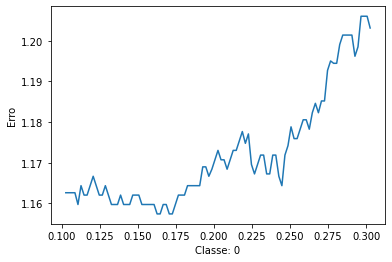

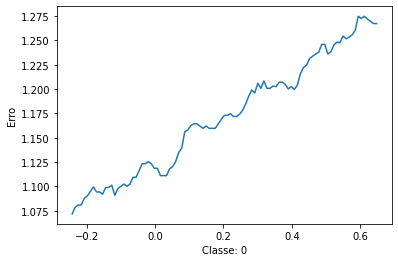

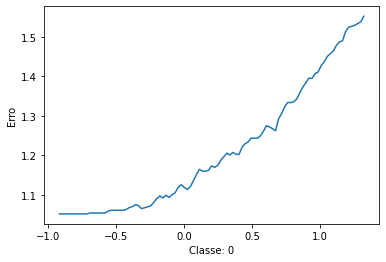

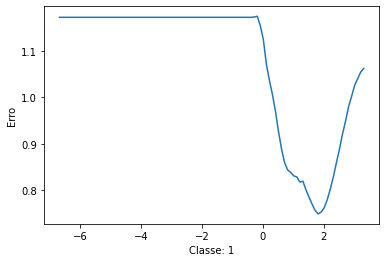

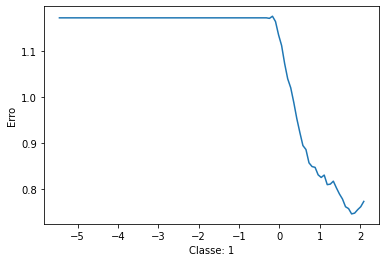

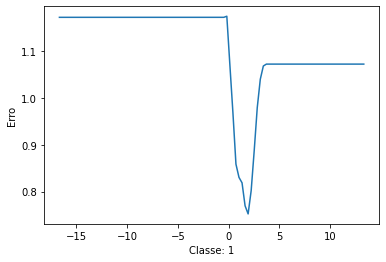

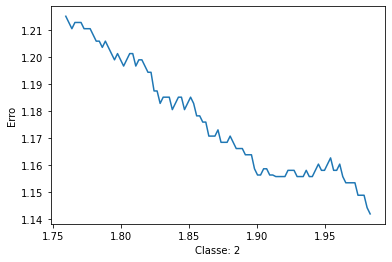

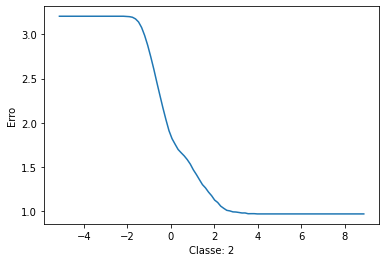

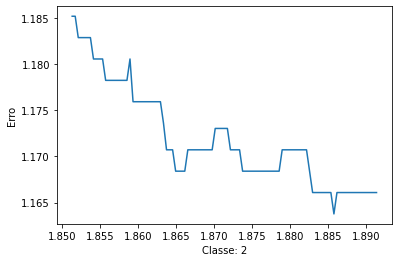

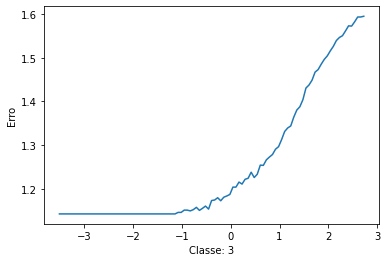

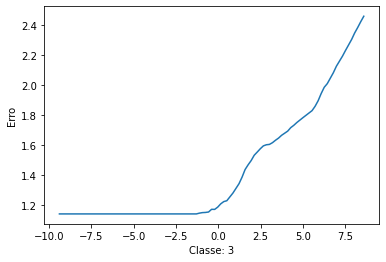

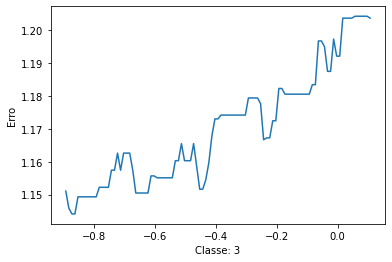

In [12]:
delta = [[0.1,   5,    0.112, 3.12],
         [0.445, 3.77, 7,     9],
         [1.12,  15,   0.02,  0.5]]

def plot(i,j):
    erros = []
    intercept = modelo.intercept_[i]  
    ws = np.linspace(intercept-delta[j][i], intercept+delta[j][i], 101)
    for w in ws:
        modelo.intercept_[i] = w
        ypred = modelo.predict(X)
        erro = mean_squared_error(y, ypred)
        erros.append(erro)    
    modelo.intercept_[i] = intercept #volta ao ao valor original
    plt.ylabel("Erro")
    plt.xlabel(f"Classe: {i}")  
    plt.plot(ws,erros)
    plt.show()

for i in range(len(modelo.intercept_)): #para cada classe
      for j in range(3): #3 deltas distintos
        plot(i,j)